# $\color{#0080c0}{\text{Exploratory Data Analysis and preprocessing}}$
# $\color{#ff0080}{\text{Fitabase Data}}$

## $\color{#ff0080}{\text{Table of contents}}$

- [Data exploration](#1)
- [Processing Data](#2)
  - [Date and time processing](#2-1)
  - [Data integrity](#2-2)
- [Exploratory Data Analysis](#3)
  - [Outliers](#3-1)
  - [Correlation](#3-2)
- [Analysis](#4)

## $\color{#ff0080}{\text{Data exploration}}$ <a name="1"></a>

#### $\color{#ff702b}{\text{Importing libraries}}$

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
dailyActivity = pd.read_csv("Fitabase Data/dailyActivity_merged.csv")
hourlyCalories = pd.read_csv("Fitabase Data/hourlyCalories_merged.csv")
heartrate_seconds = pd.read_csv('Fitabase Data/heartrate_seconds_merged.csv')
hourlyIntensities = pd.read_csv("Fitabase Data/hourlyIntensities_merged.csv")
hourlySteps = pd.read_csv("Fitabase Data/hourlySteps_merged.csv")
sleepDay = pd.read_csv("Fitabase Data/sleepDay_merged.csv")
weightLogInfo = pd.read_csv("Fitabase Data/weightLogInfo_merged.csv")

In [3]:
dailyActivity.sample(6)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
427,4388161847,4/27/2016,11193,8.61,8.61,0.0,0.70,2.51,5.39,0.0,11,48,241,684,3074
776,8053475328,4/20/2016,15108,12.19,12.19,0.0,9.58,0.23,2.38,0.0,89,5,158,695,3043
95,1844505072,4/15/2016,3844,2.54,2.54,0.0,0.00,0.00,2.54,0.0,0,0,176,527,1725
124,1927972279,4/13/2016,356,0.25,0.25,0.0,0.00,0.00,0.25,0.0,0,0,32,986,2151
701,6962181067,5/3/2016,12109,8.12,8.12,0.0,1.74,2.04,4.33,0.0,21,36,267,654,2072
598,6117666160,4/13/2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1496


In [4]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
hourlyCalories.sample(6)

,Id,ActivityHour,Calories
16670,6962181067,5/9/2016 3:00:00 PM,59
13462,5577150313,4/16/2016 2:00:00 AM,85
20784,8792009665,4/15/2016 8:00:00 PM,93
15080,6290855005,4/26/2016 12:00:00 PM,86
5001,2026352035,5/8/2016 1:00:00 PM,66
694,1503960366,5/10/2016 10:00:00 PM,50


In [6]:
hourlyCalories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [7]:
heartrate_seconds.sample(6)

,Id,Time,Value
2357436,8877689391,4/24/2016 5:22:01 PM,163
1724855,6775888955,4/26/2016 12:06:00 PM,56
1972833,6962181067,5/9/2016 3:00:10 PM,72
2461595,8877689391,5/9/2016 1:48:34 PM,62
187345,2347167796,4/15/2016 2:42:50 PM,75
2220926,8792009665,4/30/2016 12:04:55 PM,97


In [8]:
heartrate_seconds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [9]:
hourlyIntensities.sample(6)

,Id,ActivityHour,TotalIntensity,AverageIntensity
18852,8253242879,4/13/2016 8:00:00 PM,6,0.100000
18805,8053475328,5/12/2016 12:00:00 PM,23,0.383333
20483,8583815059,5/3/2016 5:00:00 AM,0,0.000000
4220,2022484408,5/6/2016 4:00:00 PM,20,0.333333
13944,5577150313,5/6/2016 4:00:00 AM,0,0.000000
6879,2873212765,5/8/2016 6:00:00 AM,0,0.000000


In [10]:
hourlyIntensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [11]:
hourlySteps.sample(6)

,Id,ActivityHour,StepTotal
1402,1624580081,5/10/2016 1:00:00 PM,1376
17840,7086361926,5/2/2016 8:00:00 PM,0
12020,4702921684,4/16/2016 9:00:00 PM,973
3484,1927972279,5/6/2016 4:00:00 PM,72
11427,4558609924,4/22/2016 8:00:00 PM,520
5478,2320127002,4/27/2016 6:00:00 PM,0


In [12]:
hourlySteps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [13]:
sleepDay.sample(6)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
312,6962181067,4/18/2016 12:00:00 AM,1,442,458
246,5553957443,4/30/2016 12:00:00 AM,2,775,843
274,5577150313,4/27/2016 12:00:00 AM,1,424,452
319,6962181067,4/25/2016 12:00:00 AM,1,400,415
348,7086361926,4/25/2016 12:00:00 AM,1,446,447
67,2347167796,4/14/2016 12:00:00 AM,1,445,489


In [14]:
sleepDay.rename(columns={'SleepDay': 'SleepDate'}, inplace=True)

In [15]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDate           413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [16]:
weightLogInfo.sample(6)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
53,8877689391,4/25/2016 6:40:16 AM,85.400002,188.274775,NaN,25.559999,False,1461566416000
54,8877689391,4/26/2016 6:50:27 AM,85.099998,187.613382,NaN,25.490000,False,1461653427000
8,4558609924,4/25/2016 11:59:59 PM,70.300003,154.984977,NaN,27.459999,True,1461628799000
33,6962181067,5/3/2016 11:59:59 PM,61.000000,134.481980,NaN,23.820000,True,1462319999000
9,4558609924,5/1/2016 11:59:59 PM,69.900002,154.103125,NaN,27.320000,True,1462147199000
27,6962181067,4/27/2016 11:59:59 PM,61.200001,134.922906,NaN,23.889999,True,1461801599000


In [17]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


## $\color{#ff0080}{\text{Processing Data}}$ <a name="2"></a>

In [18]:
weightLogInfo = weightLogInfo.drop(columns='Fat')
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   BMI             67 non-null     float64
 5   IsManualReport  67 non-null     bool   
 6   LogId           67 non-null     int64  
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 3.3+ KB


In [19]:
uniq = dailyActivity['Id'].nunique()
print("There are ", uniq, "unique users in dailyActivity dataset")
uniq = hourlyCalories['Id'].nunique()
print("There are ", uniq, "unique users in hourlyCalories dataset")
uniq = heartrate_seconds['Id'].nunique()
print("There are ", uniq, "unique users in heartrate_seconds dataset")
uniq = hourlyIntensities['Id'].nunique()
print("There are ", uniq, "unique users in hourlyIntensities dataset")
uniq = hourlySteps['Id'].nunique()
print("There are ", uniq, "unique users in hourlySteps dataset")
uniq = sleepDay['Id'].nunique()
print("There are ", uniq, "unique users in sleepDay dataset")
uniq = weightLogInfo['Id'].nunique()
print("There are ", uniq, "unique users in weightLogInfo dataset")

There are  33 unique users in dailyActivity dataset
There are  33 unique users in hourlyCalories dataset
There are  14 unique users in heartrate_seconds dataset
There are  33 unique users in hourlyIntensities dataset
There are  33 unique users in hourlySteps dataset
There are  24 unique users in sleepDay dataset
There are  8 unique users in weightLogInfo dataset


### $\color{#ff702b}{\text{Date and time processing}}$ <a name="2-1"></a>

In [20]:
dailyActivity['ActivityDate'].dtype

dtype('O')

In [21]:
dailyActivity["ActivityDate"] = pd.to_datetime(dailyActivity["ActivityDate"])
print("Data type :", dailyActivity['ActivityDate'].dtype)

Data type : datetime64[ns]


In [22]:
print("Data type :", hourlyCalories["ActivityHour"].dtype)
print("Data type :", hourlyIntensities["ActivityHour"].dtype)
print("Data type :", hourlySteps["ActivityHour"].dtype)
print("Data type :", sleepDay["SleepDate"].dtype)

Data type : object
Data type : object
Data type : object
Data type : object


In [23]:
hourlyCalories["ActivityHour"] = pd.to_datetime(hourlyCalories["ActivityHour"])
hourlyIntensities["ActivityHour"] = pd.to_datetime(hourlyIntensities["ActivityHour"])
hourlySteps["ActivityHour"] = pd.to_datetime(hourlySteps["ActivityHour"])
sleepDay["SleepDate"] = pd.to_datetime(sleepDay["SleepDate"])

In [24]:
print("Data type :", hourlyCalories["ActivityHour"].dtype)
print("Data type :", hourlyIntensities["ActivityHour"].dtype)
print("Data type :", hourlySteps["ActivityHour"].dtype)
print("Data type :", sleepDay["SleepDate"].dtype)

Data type : datetime64[ns]
Data type : datetime64[ns]
Data type : datetime64[ns]
Data type : datetime64[ns]


In [25]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [26]:
dailyActivity['ActivityDay'] = dailyActivity['ActivityDate'].dt.strftime('%a')
dailyActivity['ActivityMonth'] = dailyActivity['ActivityDate'].dt.strftime('%b')

In [27]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,ActivityMonth
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tue,Apr
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wed,Apr
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thu,Apr
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Fri,Apr
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Sat,Apr


In [28]:
hourlyCalories.head()

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [29]:
hourlyCalories['ActivityDate'] = hourlyCalories['ActivityHour'].dt.date
hourlyCalories['ActivityHour'] = hourlyCalories['ActivityHour'].dt.time
hourlyCalories.head()

,Id,ActivityHour,Calories,ActivityDate
0,1503960366,00:00:00,81,2016-04-12
1,1503960366,01:00:00,61,2016-04-12
2,1503960366,02:00:00,59,2016-04-12
3,1503960366,03:00:00,47,2016-04-12
4,1503960366,04:00:00,48,2016-04-12


In [30]:
hourlyIntensities.sample(4)

,Id,ActivityHour,TotalIntensity,AverageIntensity
693,1503960366,2016-05-10 21:00:00,19,0.316667
11080,4445114986,2016-05-09 00:00:00,1,0.016667
9200,4319703577,2016-04-21 11:00:00,0,0.000000
17978,7086361926,2016-05-08 14:00:00,5,0.083333


In [31]:
hourlyIntensities['ActivityDate'] = hourlyIntensities['ActivityHour'].dt.date
hourlyIntensities['ActivityHour'] = hourlyIntensities['ActivityHour'].dt.time
hourlyIntensities.sample(4)

,Id,ActivityHour,TotalIntensity,AverageIntensity,ActivityDate
10853,4445114986,13:00:00,13,0.216667,2016-04-29
13342,5553957443,12:00:00,21,0.350000,2016-05-11
610,1503960366,10:00:00,46,0.766667,2016-05-07
4625,2026352035,21:00:00,0,0.000000,2016-04-22


In [32]:
hourlySteps.sample(4)

,Id,ActivityHour,StepTotal
12659,5553957443,2016-04-13 01:00:00,0
8712,4020332650,2016-05-05 07:00:00,0
9186,4319703577,2016-04-20 21:00:00,177
5798,2320127002,2016-05-11 02:00:00,0


In [33]:
hourlySteps['ActivityDate'] = hourlySteps['ActivityHour'].dt.date
hourlySteps['ActivityDay'] = hourlySteps['ActivityHour'].dt.strftime('%a')
hourlySteps['ActivityHour'] = hourlySteps['ActivityHour'].dt.time
hourlySteps.sample(4)

,Id,ActivityHour,StepTotal,ActivityDate,ActivityDay
15081,6290855005,13:00:00,0,2016-04-26,Tue
19658,8378563200,11:00:00,462,2016-04-29,Fri
15909,6775888955,08:00:00,0,2016-05-03,Tue
10295,4388161847,22:00:00,13,2016-05-06,Fri


In [34]:
sleepDay.sample(6)

,Id,SleepDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
200,4702921684,2016-04-12,1,425,439
60,2026352035,2016-05-08,1,541,568
364,8053475328,2016-04-23,1,331,337
365,8053475328,2016-05-07,1,74,75
217,4702921684,2016-04-30,1,479,501
62,2026352035,2016-05-10,1,357,380


In [35]:
sleepDay['SleepDay'] = sleepDay['SleepDate'].dt.strftime('%a')
sleepDay['SleepDay'] = sleepDay['SleepDate'].dt.strftime('%b')
sleepDay.sample(4)

,Id,SleepDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepDay
400,8792009665,2016-04-14,1,486,503,Apr
287,6117666160,2016-04-18,2,493,510,Apr
40,2026352035,2016-04-15,1,523,573,Apr
225,4702921684,2016-05-10,1,416,431,May


### $\color{#ff702b}{\text{Data integrity}}$ <a name="2-2"></a>

In [36]:
dup = dailyActivity[dailyActivity.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in dataset.")

There are  0  duplicated rows in dataset.


In [37]:
dup = hourlyCalories[hourlyCalories.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in hourlyCalories dataset.")
dup = hourlyIntensities[hourlyIntensities.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in hourlyIntensities dataset.")
dup = hourlySteps[hourlySteps.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in hourlySteps dataset.")
dup = sleepDay[sleepDay.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in sleepDay dataset.")
dup = heartrate_seconds[heartrate_seconds.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in heartrate_seconds dataset.")
dup = weightLogInfo[weightLogInfo.duplicated()].shape[0]
print("There are ", dup, " duplicated rows in weightLogInfo dataset.")

There are  0  duplicated rows in hourlyCalories dataset.
There are  0  duplicated rows in hourlyIntensities dataset.
There are  0  duplicated rows in hourlySteps dataset.
There are  3  duplicated rows in sleepDay dataset.
There are  0  duplicated rows in heartrate_seconds dataset.
There are  0  duplicated rows in weightLogInfo dataset.


In [38]:
sleepDay.drop_duplicates(inplace=True)
print("There are ", dup, " duplicated rows in sleepDay dataset.")

There are  0  duplicated rows in sleepDay dataset.


## $\color{#ff0080}{\text{Exploratory Data Analysis}}$ <a name="3"></a>

### $\color{#ff702b}{\text{Outliers}}$ <a name="3-1"></a>

Text(0.5, 0.9, 'Outliers')

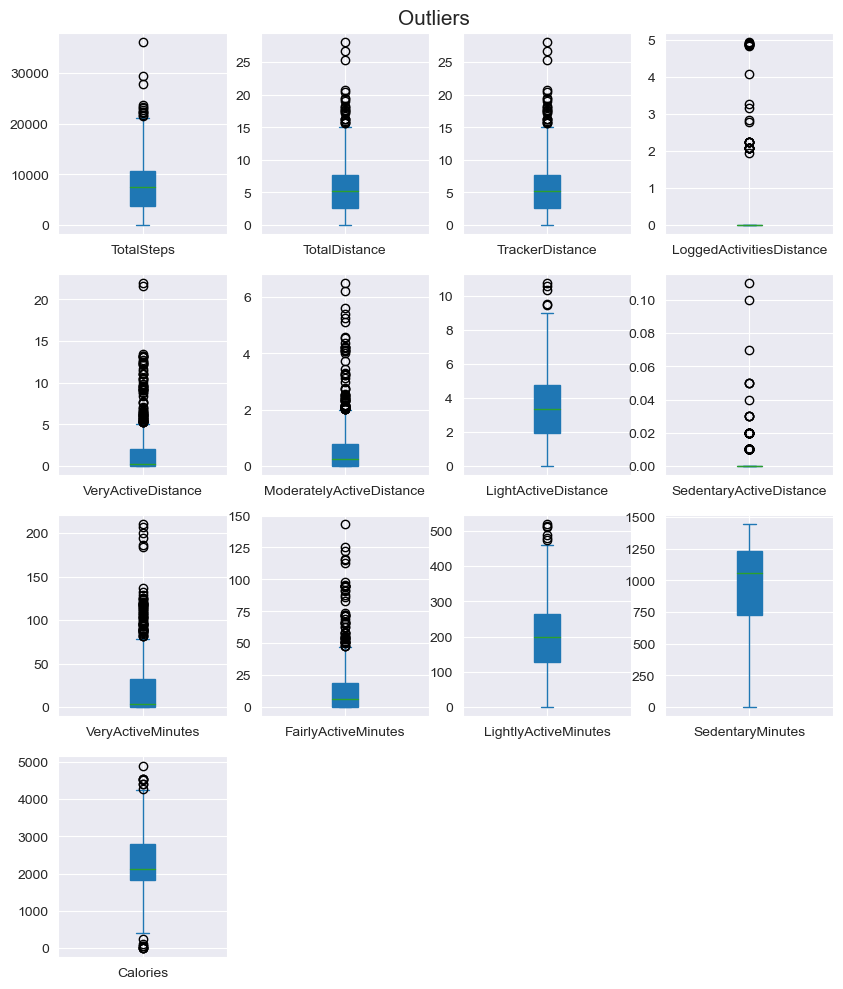

In [39]:
ploting_data = dailyActivity.drop(columns='Id').select_dtypes(include=np.number)

sns.set_style('darkgrid')
ploting_data.plot(subplots=True, layout=(4,4), kind='box', figsize=(10,12), patch_artist=True)
plt.suptitle('Outliers', fontsize=15, y=0.9)

In [40]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  410 non-null    int64         
 1   SleepDate           410 non-null    datetime64[ns]
 2   TotalSleepRecords   410 non-null    int64         
 3   TotalMinutesAsleep  410 non-null    int64         
 4   TotalTimeInBed      410 non-null    int64         
 5   SleepDay            410 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 22.4+ KB


Text(0.5, 0.9, 'Outliers')

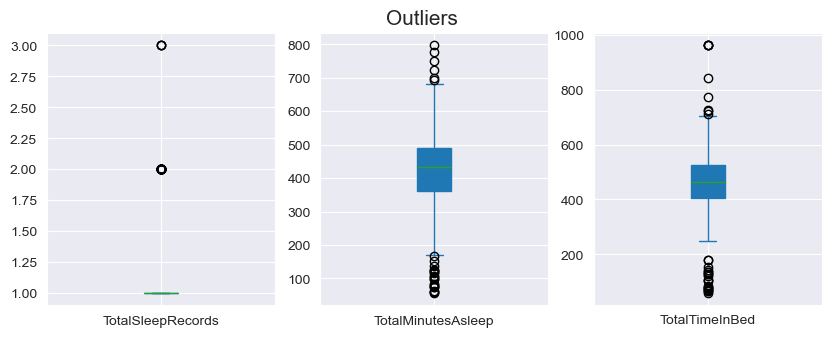

In [41]:
ploting_data = sleepDay.drop(columns='Id').select_dtypes(include=np.number)

sns.set_style('darkgrid')
ploting_data.plot(subplots=True, layout=(3,3), kind='box', figsize=(10,12), patch_artist=True)
plt.suptitle('Outliers', fontsize=15, y=0.9)

In [42]:
weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   BMI             67 non-null     float64
 5   IsManualReport  67 non-null     bool   
 6   LogId           67 non-null     int64  
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 3.3+ KB


Text(0.5, 0.9, 'Outliers')

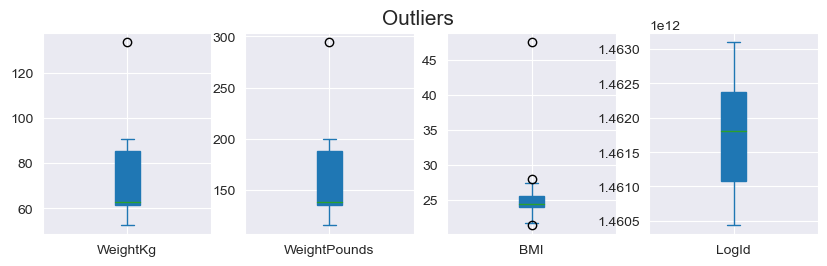

In [43]:
ploting_data = weightLogInfo.drop(columns='Id').select_dtypes(include=np.number)

sns.set_style('darkgrid')
ploting_data.plot(subplots=True, layout=(4,4), kind='box', figsize=(10,12), patch_artist=True)
plt.suptitle('Outliers', fontsize=15, y=0.9)

### $\color{#ff702b}{\text{Correlation}}$ <a name="3-2"></a>

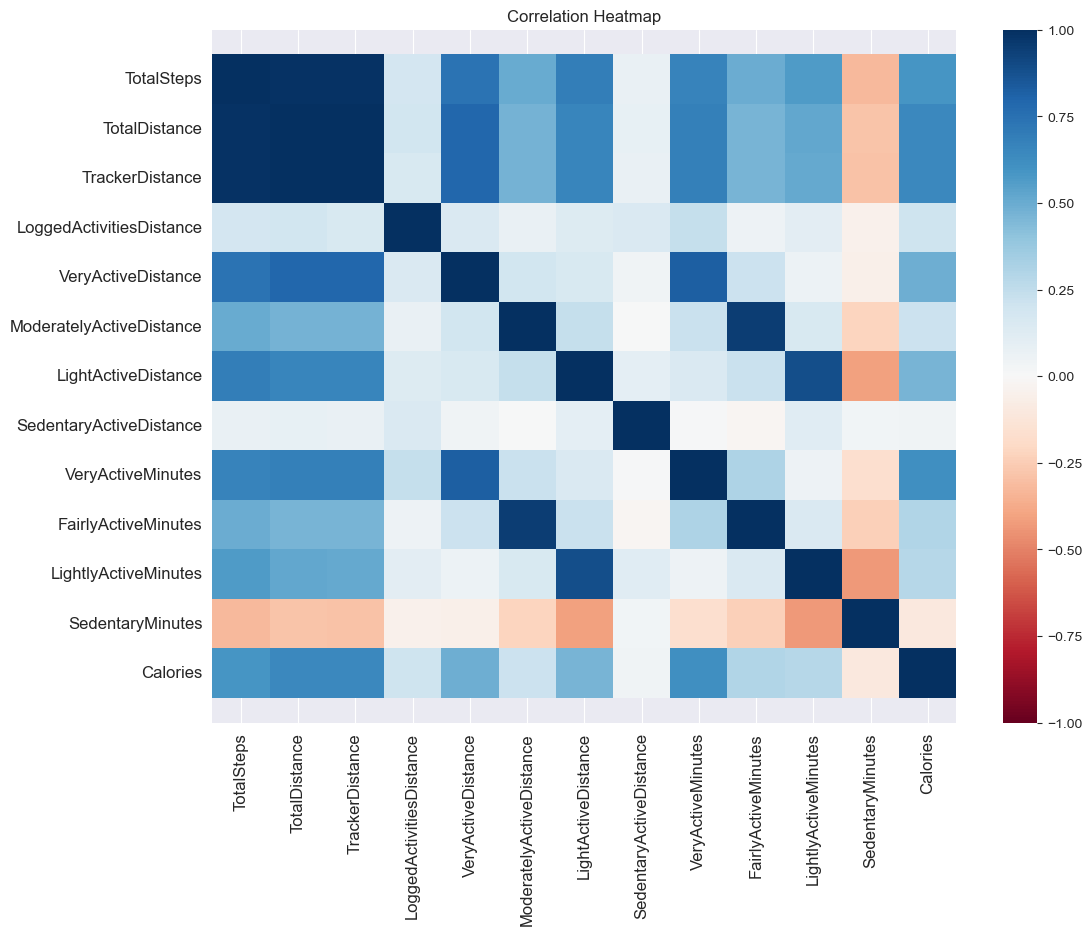

In [44]:
ploting_data = dailyActivity.drop(columns=['Id', 'ActivityDate', 'ActivityDay', 'ActivityMonth'])

plt.figure(figsize = (12, 9))
s = sns.heatmap(ploting_data.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

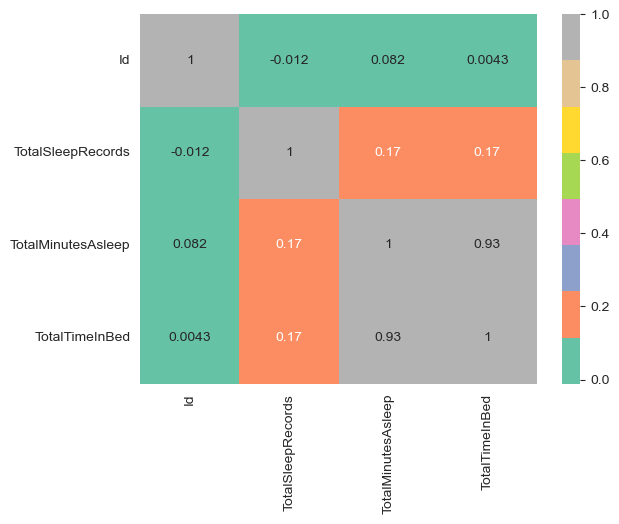

In [45]:
sns.heatmap(sleepDay.corr(numeric_only=True),annot=True,cmap='Set2')

<Axes: >

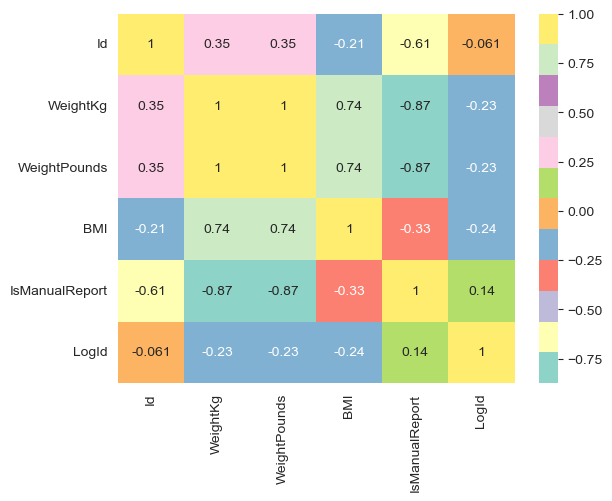

In [46]:
sns.heatmap(weightLogInfo.corr(numeric_only=True),annot=True,cmap='Set3')

## $\color{#ff0080}{\text{Analysis}}$ <a name="4"></a>

Text(0.5, 1.0, 'Total Steps vs Distance')

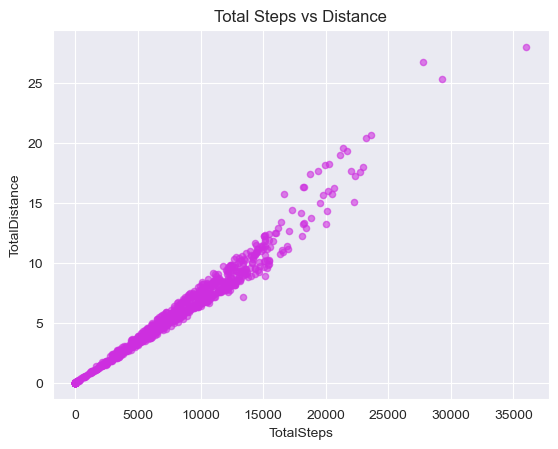

In [47]:
dailyActivity.plot.scatter(x='TotalSteps',y='TotalDistance', alpha =0.6, c ='#cd2fdf')
plt.title('Total Steps vs Distance')

This graph shows the total number of steps taken by all users against the total number of Distance.

Text(0.5, 1.0, 'Total Distance vs Calories')

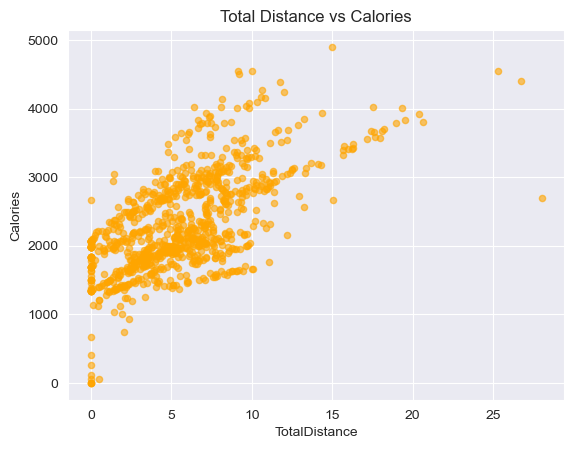

In [48]:
dailyActivity.plot.scatter(x='TotalDistance',y='Calories', alpha =0.6, color='orange')
plt.title('Total Distance vs Calories')

This graph shows the total number of Distance taken by all users against the total number of calories burned.
This gives us an overview of the distribution of data related to distances and calories burned

Text(0.5, 1.0, 'Total Steps vs Calories')

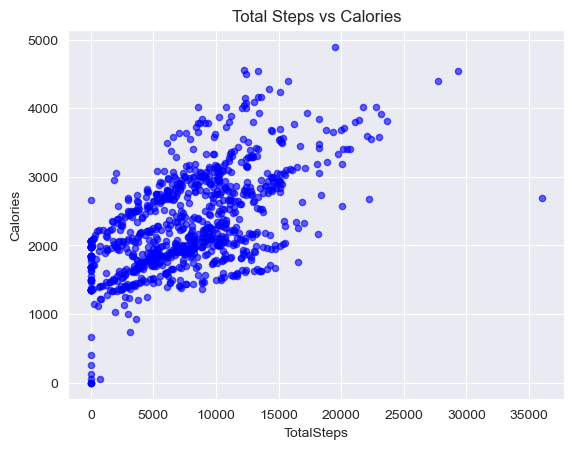

In [49]:
dailyActivity.plot.scatter(x='TotalSteps',y='Calories', alpha =0.6, color='blue')
plt.title('Total Steps vs Calories')

This graph shows the total number of steps taken by all users against the total number of calories burned.

Text(0.5, 1.0, 'Total Steps Taken By Weekday')

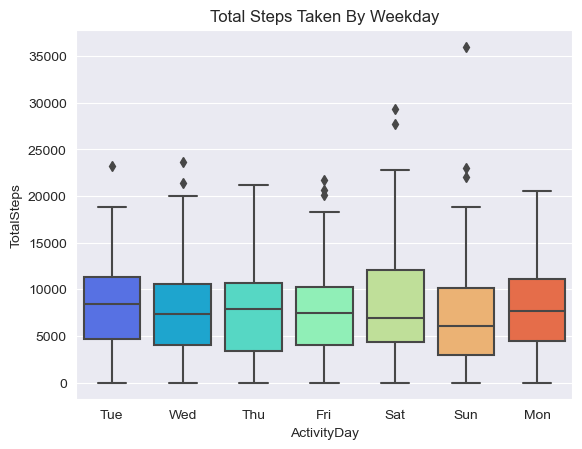

In [50]:
sns.boxplot(x='ActivityDay',y='TotalSteps',data=dailyActivity,palette='rainbow')
plt.title('Total Steps Taken By Weekday')

Text(0.5, 1.0, 'Total Calories burnt by Weekday')

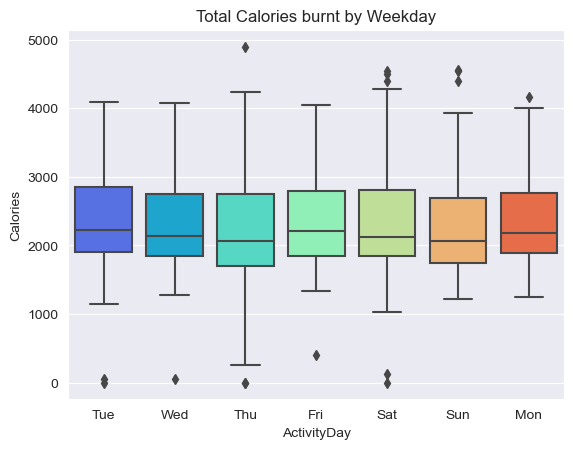

In [51]:
sns.boxplot(x='ActivityDay',y='Calories',data=dailyActivity,palette='rainbow')
plt.title('Total Calories burnt by Weekday')

In [52]:
# Calculate the average steps per user
averageSteps = dailyActivity.groupby('Id')['TotalSteps'].mean()
print(averageSteps.isnull().sum())
print(len(averageSteps))

averageSteps_data = averageSteps.reset_index()
averageSteps_data.columns = ['Id', 'AverageSteps']
averageSteps_data.head(6)

0
33


,Id,AverageSteps
0,1503960366,12116.741935
1,1624580081,5743.903226
2,1644430081,7282.966667
3,1844505072,2580.064516
4,1927972279,916.129032
5,2022484408,11370.645161


In [53]:
# Define a function to classify users based on average steps
def classifyUsers(avg_steps):
    if avg_steps < 2500:
        return 'Sedentary'
    elif avg_steps >= 2500 and avg_steps < 5000:
        return 'Lightly Active'
    elif avg_steps >= 5000 and avg_steps < 7500:
        return 'Active Users'
    elif avg_steps >= 7500 and avg_steps < 10000:
        return 'Fairly Active'
    else:
        return 'Super Active'

averageSteps_data['UserClassification'] = averageSteps_data['AverageSteps'].apply(classifyUsers)
averageSteps_data.head(6)

,Id,AverageSteps,UserClassification
0,1503960366,12116.741935,Super Active
1,1624580081,5743.903226,Active Users
2,1644430081,7282.966667,Active Users
3,1844505072,2580.064516,Lightly Active
4,1927972279,916.129032,Sedentary
5,2022484408,11370.645161,Super Active


Active Users      9
Fairly Active     9
Super Active      7
Lightly Active    5
Sedentary         3
Name: UserClassification, dtype: int64


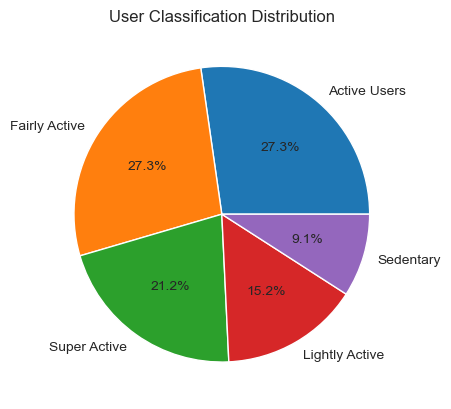

In [54]:
classification_counts = averageSteps_data['UserClassification'].value_counts()
print(classification_counts)

plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%')
plt.title('User Classification Distribution')
plt.show()

The dataset contains different levels of activity during sports exercises, each user is classified in a class among the following:  
- Active Users      
- Fairly Active     
- Super Active      
- Lightly Active    
- Sedentary

The average of the steps taken for each user of the thirty-three users was calculated and a function was created to classify the averages into 5 classes

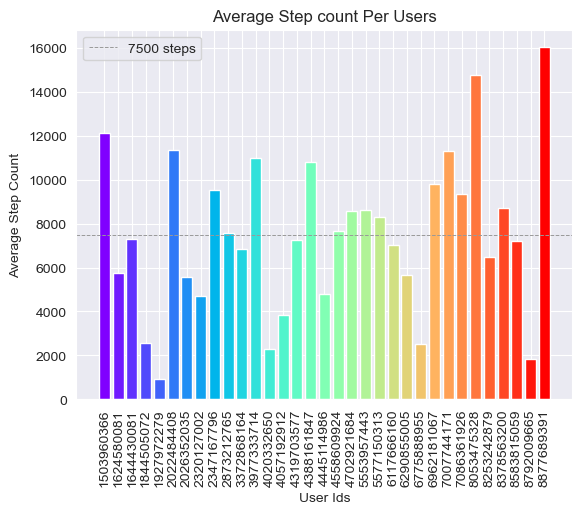

In [55]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(averageSteps)))

plt.bar(range(len(averageSteps)), averageSteps.values, color=colors)
plt.xlabel('User Ids')
plt.ylabel('Average Step Count')
plt.title('Average Step count Per Users')

plt.xticks(range(len(averageSteps)), averageSteps.index, rotation=90)

plt.axhline(y=7500, color='#999999', linestyle='--',linewidth=0.70, label='7500 steps')
plt.legend()

plt.show()

This bar graph shows the distribution of average stepS for each user. This gives us information about users who exercise more, and their rankings compared to other users

In [56]:
specific_user_id =6962181067

# Defining the start and end dates of the time period we want to filter
start_date = pd.to_datetime('2016-04-12')
end_date = pd.to_datetime('2016-04-18')

#sub_df = dailyActivitySleepMerged[dailyActivitySleepMerged['Id'] == specific_user_id]

#sub_df = dailyActivitySleepMerged[(dailyActivitySleepMerged['ActivityDate'] >= start_date) & (dailyActivitySleepMerged['ActivityDate'] <= end_date)]

sub_df = dailyActivity[(dailyActivity['ActivityDate'] >= start_date) & (dailyActivity['ActivityDate'] <= end_date)
                                  & (dailyActivity['Id'] == specific_user_id)]
print(len(sub_df))
sub_df

7


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay,ActivityMonth
680,6962181067,2016-04-12,10199,6.74,6.74,0.0,3.40,0.83,2.51,0.0,50,14,189,796,1994,Tue,Apr
681,6962181067,2016-04-13,5652,3.74,3.74,0.0,0.57,1.21,1.96,0.0,8,24,142,548,1718,Wed,Apr
682,6962181067,2016-04-14,1551,1.03,1.03,0.0,0.00,0.00,1.03,0.0,0,0,86,862,1466,Thu,Apr
683,6962181067,2016-04-15,5563,3.68,3.68,0.0,0.00,0.00,3.68,0.0,0,0,217,837,1756,Fri,Apr
684,6962181067,2016-04-16,13217,8.74,8.74,0.0,3.66,0.19,4.88,0.0,50,3,280,741,2173,Sat,Apr
685,6962181067,2016-04-17,10145,6.71,6.71,0.0,0.33,0.68,5.69,0.0,5,13,295,634,2027,Sun,Apr
686,6962181067,2016-04-18,11404,7.54,7.54,0.0,0.83,2.39,4.32,0.0,13,42,238,689,2039,Mon,Apr


In [57]:
groupedActivity = sub_df.groupby('ActivityDay')['TotalSteps'].sum()
groupedActivity

ActivityDay
Fri     5563
Mon    11404
Sat    13217
Sun    10145
Thu     1551
Tue    10199
Wed     5652
Name: TotalSteps, dtype: int64

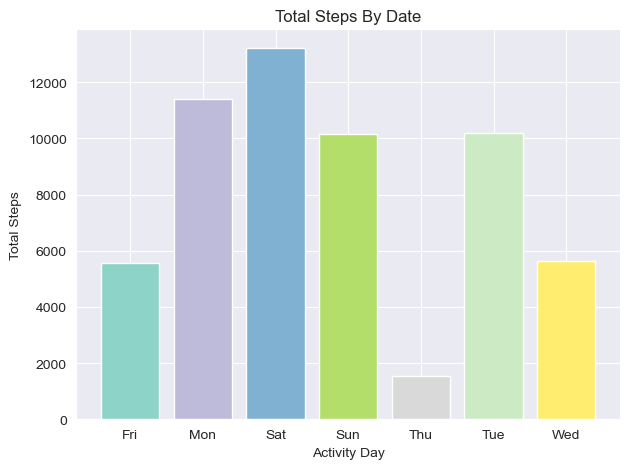

In [58]:
num_colors = len(groupedActivity)
cmap = plt.get_cmap('Set3')
colors = cmap(np.linspace(0, 1, num_colors))

fig, axs = plt.subplots()

axs.bar(groupedActivity.index, groupedActivity.values, color=colors)
axs.set_xlabel('Activity Day')
axs.set_ylabel('Total Steps')
axs.set_title('Total Steps By Date')

# Adjusting spacing between subplots
plt.tight_layout()

plt.show()

For a specic user, we can track the number of steps he performs in exercise during the days of the week

In [59]:
groupedhourlySteps = hourlySteps.groupby('ActivityHour')['StepTotal'].mean()
groupedhourlySteps.sample(6)

ActivityHour
20:00:00    353.905077
15:00:00    406.319126
02:00:00     17.110397
03:00:00      6.426581
17:00:00    550.232892
18:00:00    599.169978
Name: StepTotal, dtype: float64

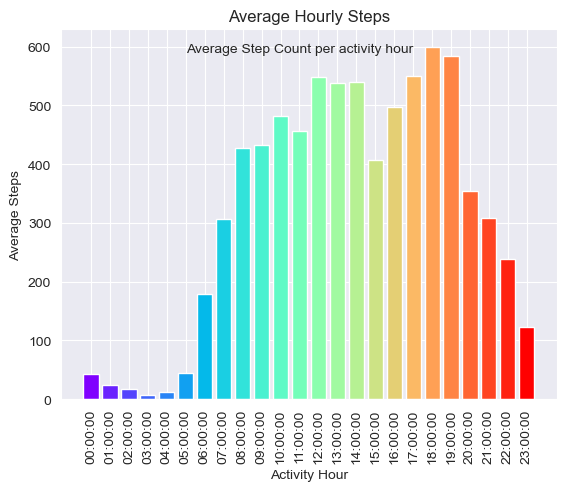

In [60]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(groupedhourlySteps)))

plt.bar(range(len(groupedhourlySteps)), groupedhourlySteps.values, color=colors)
plt.xlabel('Activity Hour')
plt.ylabel('Average Steps')
plt.title('Average Hourly Steps')

plt.xticks(range(len(groupedhourlySteps)), groupedhourlySteps.index, rotation=90)
plt.text(11, 590, 'Average Step Count per activity hour', ha='center')
plt.show()